# Набор данных об оттоке пациентов

## Постановка задачи

Отток пациентов (атрофия) — серьёзная проблема в сфере здравоохранения, которая обходится поставщикам услуг в миллиарды долларов упущенной прибыли и нарушает непрерывность лечения. 

Нужно обработать данные для более точного предсказания результатов оттока и сравнить результаты разных моделей.

## Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Загрузка данных

In [2]:
df = pd.read_csv("patient_churn_dataset.csv")

Загружаем данные из файла формата csv и сохраняем в дата-фрейм

In [3]:
df

,PatientID,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,...,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,C20000,41,Female,PA,62,Pediatrics,Medicaid,1,0,564,...,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,C20001,43,Female,GA,44,Internal Medicine,Self-Pay,7,4,254,...,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,C20002,21,Male,MI,120,Internal Medicine,Medicaid,15,5,89,...,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,C20003,65,Male,FL,118,General Practice,Private,10,3,135,...,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,C20004,18,Female,CA,70,Cardiology,Medicaid,5,4,696,...,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,C21995,31,Male,NC,78,Internal Medicine,Medicare,8,2,180,...,3.9,1.8,2.4,2.9,268,0,1,0,42.6,1
1996,C21996,45,Female,GA,69,Internal Medicine,Private,6,4,352,...,4.2,2.8,3.5,4.6,1257,1,0,3,15.4,1
1997,C21997,37,Male,NC,91,Family Medicine,Medicare,9,4,494,...,3.9,2.7,3.0,2.7,50,0,1,3,2.6,0
1998,C21998,69,Female,NY,5,Internal Medicine,Private,3,0,315,...,1.7,3.2,3.6,4.2,848,0,0,1,38.8,1


Датасет содержит следующие солбцы:

1. PatientID - уникальный идентификатор пациента
2. Age - возраст пациента
3. Gender - пол пациента
3. State - штат проживания пациента
4. Tenure_Months - сколько месяцев пациент обслуживается в клинике
5. Specialty - специализация врача/отделения, которое посещает пациент
6. Insurance_Type - тип страховки пациента
7. Visits_Last_Year - количество визитов за последний год
8. Missed_Appointments - количество пропущенных приемов
9. Days_Since_Last_Visit - дней с последнего визита
10. Last_Interaction_Date - дата последнего взаимодействия
11. Overall_Satisfaction - общая удовлетворенность
12. Wait_Time_Satisfaction - удовлетворенность временем ожидания
13. Staff_Satisfaction - удовлетворенность персоналом
14. Provider_Rating - оценка врача/провайдера услуг
15. Avg_Out_Of_Pocket_Cost - средние личные расходы пациента
16. Billing_Issues - количество проблем со счетами/оплатой
17. Portal_Usage - частота использования пациентского портала
18. Referrals_Made - количество направлений/рекомендаций, сделанных пациентом
19. Distance_To_Facility_Miles - расстояние до медицинского учреждения в милях


Целевая переменная:
- Churned - показатель оттока (утраты пациента):

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PatientID                   2000 non-null   object 
 1   Age                         2000 non-null   int64  
 2   Gender                      2000 non-null   object 
 3   State                       2000 non-null   object 
 4   Tenure_Months               2000 non-null   int64  
 5   Specialty                   2000 non-null   object 
 6   Insurance_Type              2000 non-null   object 
 7   Visits_Last_Year            2000 non-null   int64  
 8   Missed_Appointments         2000 non-null   int64  
 9   Days_Since_Last_Visit       2000 non-null   int64  
 10  Last_Interaction_Date       2000 non-null   object 
 11  Overall_Satisfaction        2000 non-null   float64
 12  Wait_Time_Satisfaction      2000 non-null   float64
 13  Staff_Satisfaction          2000 

Набор данных имеет 2000 строчек и 21 признак. Отсутствуют пропущенные значения во всех столбцах

In [5]:
df.describe()

,Age,Tenure_Months,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.856500,60.733500,7.614000,2.028000,366.130000,3.255000,3.289900,3.525900,3.736100,836.544000,0.078500,0.206000,1.483500,25.167400,0.683500
std,15.836487,35.111293,4.672143,1.699312,212.890277,1.008595,1.009062,0.871613,0.733748,589.031896,0.269024,0.404532,1.100151,13.948284,0.465227
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.500000,1.500000,2.000000,2.500000,20.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,41.000000,30.000000,4.000000,0.000000,180.000000,2.400000,2.400000,2.775000,3.100000,326.000000,0.000000,0.000000,1.000000,12.800000,0.000000
50%,54.000000,60.000000,8.000000,2.000000,363.000000,3.200000,3.300000,3.500000,3.800000,716.000000,0.000000,0.000000,1.000000,25.000000,1.000000
75%,65.000000,92.250000,12.000000,3.000000,550.250000,4.100000,4.100000,4.300000,4.400000,1368.250000,0.000000,0.000000,2.000000,37.200000,1.000000
max,90.000000,120.000000,15.000000,5.000000,730.000000,5.000000,5.000000,5.000000,5.000000,1999.000000,1.000000,1.000000,3.000000,50.000000,1.000000


Данные в целом нормальные: возрасты от 18 до 90 лет, в основном взрослые пациенты. Люди ходят к врачам нечасто — в среднем 8 раз в год, но некоторые не были больше года. Удовлетворенность средняя, около 3.5 баллов из 5.

In [6]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
le = LabelEncoder()

In [8]:
df['Gender'] = le.fit_transform(df['Gender'])

In [9]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
for category, code in mapping.items():
    print(f"{category}: {code}")

Female: 0
Male: 1


In [10]:
df['Specialty'].unique()

array(['Pediatrics', 'Internal Medicine', 'General Practice',
       'Cardiology', 'Orthopedics', 'Neurology', 'Family Medicine'],
      dtype=object)

In [11]:
df['Specialty'] = le.fit_transform(df['Specialty'])

In [12]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
for category, code in mapping.items():
    print(f"{category}: {code}")

Cardiology: 0
Family Medicine: 1
General Practice: 2
Internal Medicine: 3
Neurology: 4
Orthopedics: 5
Pediatrics: 6


In [13]:
df['Insurance_Type'].unique()

array(['Medicaid', 'Self-Pay', 'Private', 'Medicare'], dtype=object)

In [14]:
df['Insurance_Type'] = le.fit_transform(df['Insurance_Type'])

In [15]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
for category, code in mapping.items():
    print(f"{category}: {code}")

Medicaid: 0
Medicare: 1
Private: 2
Self-Pay: 3


In [16]:
df['State'].unique()

array(['PA', 'GA', 'MI', 'FL', 'CA', 'NY', 'TX', 'OH', 'IL', 'NC'],
      dtype=object)

In [17]:
df['State'] = le.fit_transform(df['State'])

In [18]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
for category, code in mapping.items():
    print(f"{category}: {code}")

CA: 0
FL: 1
GA: 2
IL: 3
MI: 4
NC: 5
NY: 6
OH: 7
PA: 8
TX: 9


Провели преобразование категориальных переменных в числовой формат для дальнейшего анализа.

In [19]:
df = df.drop(['PatientID'], axis=1)

Удалили столбец PatientID из датасета, так как он не содержит полезной информации для прогнозирования оттока.

In [20]:
df

,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,Last_Interaction_Date,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,41,0,8,62,6,0,1,0,564,2024-07-05,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,43,0,2,44,3,3,7,4,254,2025-05-11,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,21,1,4,120,3,0,15,5,89,2025-10-23,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,65,1,1,118,2,2,10,3,135,2025-09-07,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,18,0,0,70,0,0,5,4,696,2024-02-24,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,31,1,5,78,3,1,8,2,180,2025-07-24,3.9,1.8,2.4,2.9,268,0,1,0,42.6,1
1996,45,0,2,69,3,2,6,4,352,2025-02-02,4.2,2.8,3.5,4.6,1257,1,0,3,15.4,1
1997,37,1,5,91,1,1,9,4,494,2024-09-13,3.9,2.7,3.0,2.7,50,0,1,3,2.6,0
1998,69,0,6,5,3,2,3,0,315,2025-03-11,1.7,3.2,3.6,4.2,848,0,0,1,38.8,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         2000 non-null   int64  
 1   Gender                      2000 non-null   int64  
 2   State                       2000 non-null   int64  
 3   Tenure_Months               2000 non-null   int64  
 4   Specialty                   2000 non-null   int64  
 5   Insurance_Type              2000 non-null   int64  
 6   Visits_Last_Year            2000 non-null   int64  
 7   Missed_Appointments         2000 non-null   int64  
 8   Days_Since_Last_Visit       2000 non-null   int64  
 9   Last_Interaction_Date       2000 non-null   object 
 10  Overall_Satisfaction        2000 non-null   float64
 11  Wait_Time_Satisfaction      2000 non-null   float64
 12  Staff_Satisfaction          2000 non-null   float64
 13  Provider_Rating             2000 

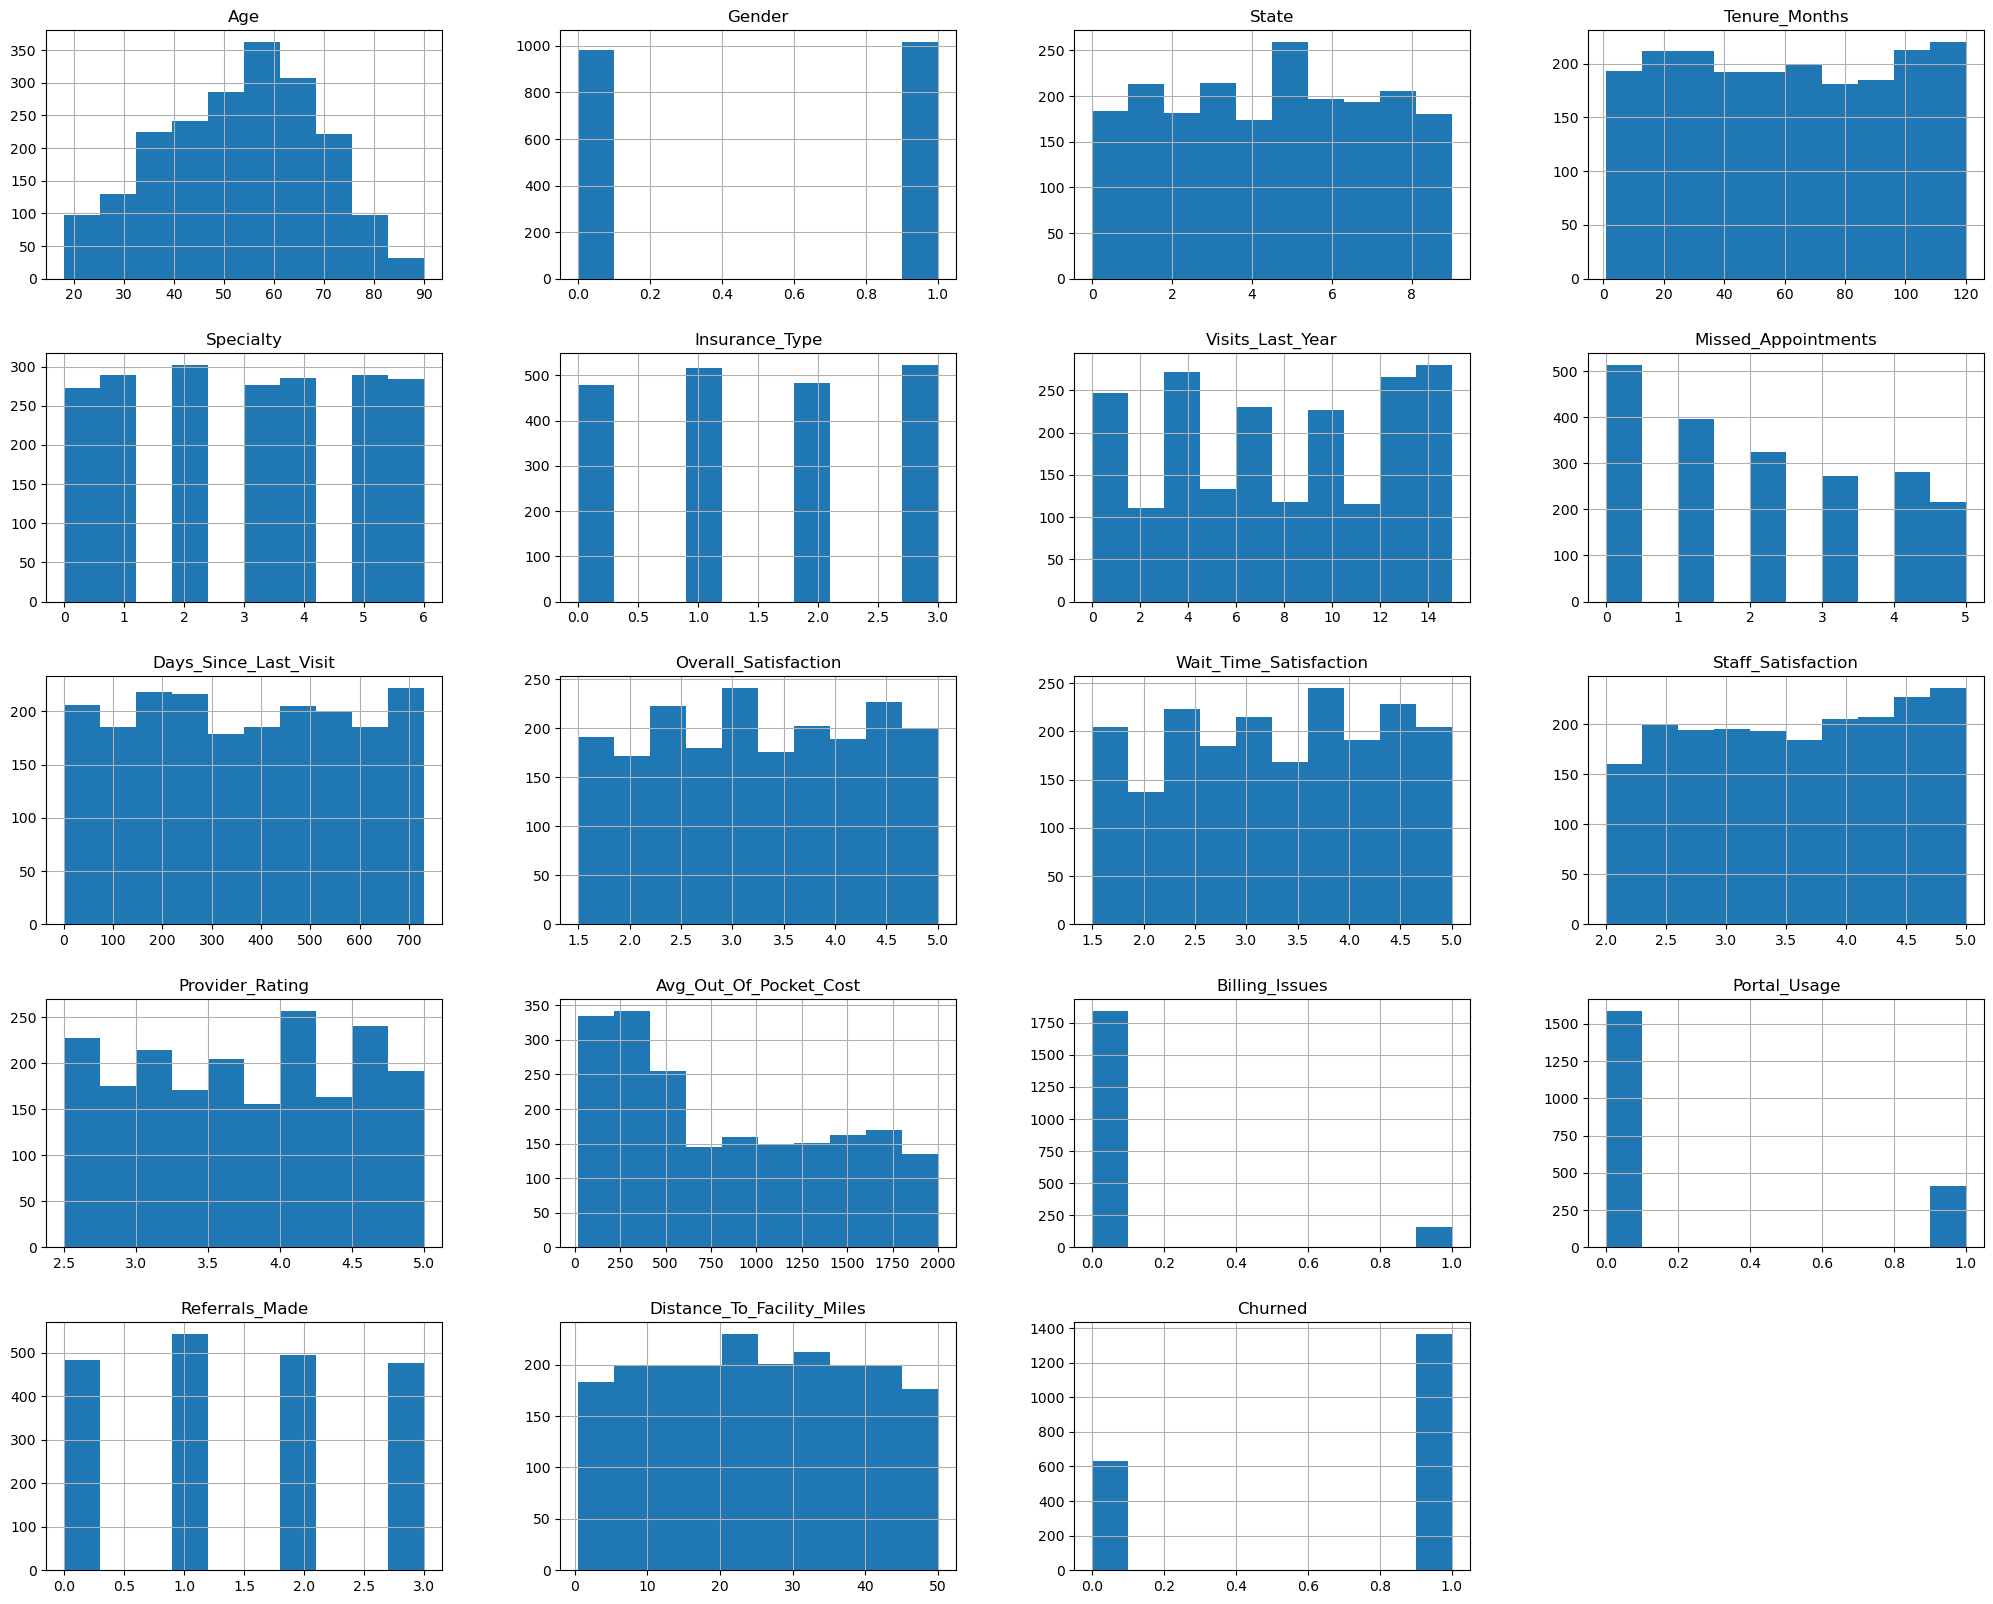

In [22]:
df.hist(figsize = (25,20));
plt.show()

- Возраст (Age) — нормальное распределение, большинство пациентов 40-70 лет;
- Пол (Gender) — почти равное соотношение мужчин и женщин
- Распределение по врачебным направлениям равномерное;
- Время обслуживания смещено вправо, присутсвует много новых пациентов;
- Большинство имеют 0-2 пропуска;
- У большинства небольшие траты;
- У оттока явный дисбаланс: около 70% пациентов ушли

In [23]:
df = df.drop(['Last_Interaction_Date'], axis=1)

<Axes: >

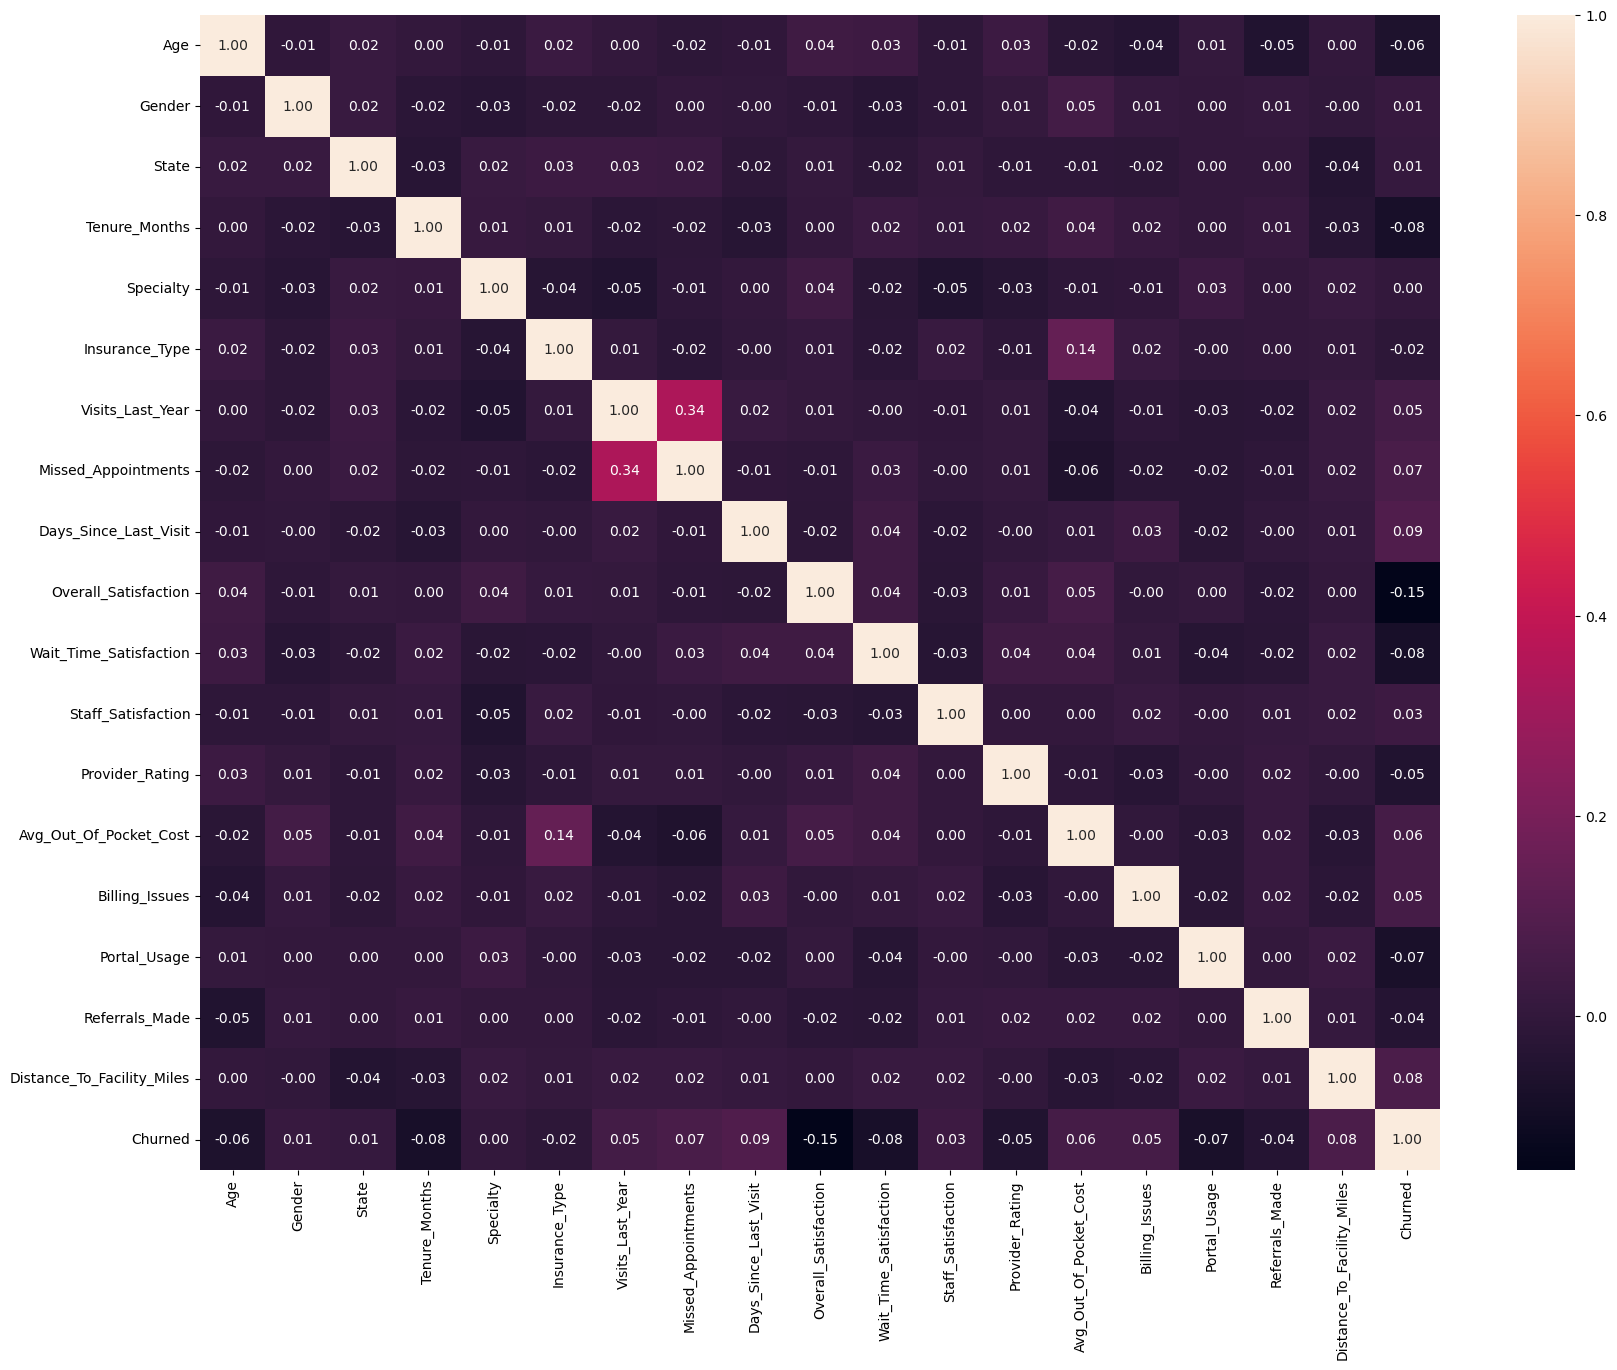

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f")

Данные имеют логичные, но относительно слабые взаимосвязи. Ни один признак не объясняет отток значительно, что указывает на необходимость комплексного подхода и использования всех признаков в модели.

In [25]:
df_selected = df.drop(['State'], axis=1)

Удалили признак State (штат проживания) из датасета, так как он не несет значимой информации для прогнозирования оттока пациентов.

## Обучение классификатора

### Нейронка

In [27]:
X = df_selected.drop(columns=['Churned'])
y = df_selected['Churned']

Записывем датасет без целевой переменной и выделяем целевую переменную y отдельно.

In [28]:
class_distribution = y.value_counts().sort_index()

In [29]:
class_distribution

Churned
0     633
1    1367
Name: count, dtype: int64

Можно увидеть сильный дисбаланс классов: 633 пациента остались и 1367 ушли.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, stratify=y)

In [31]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()

Применили StandardScaler к признакам X для приведения к единому масштабу.

In [32]:
classes = np.unique(y_train_scaled)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes, 
    y=y_train_scaled
)

Рассчитали веса классов методом balanced для борьбы с дисбалансом. Так класс 0 получит больший вес, чтобы модель больше "обращала внимание" на случаи оттока. Это поможет улучшить качество предсказания.

In [33]:
class_weight_dict = dict(zip(classes, class_weights))
for cls, weight in class_weight_dict.items():
    print(f"Класс {cls}: {weight:.2f}")
print()

Класс 0: 1.58
Класс 1: 0.73



In [34]:
input_shape = X_train.shape[1]

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape,), name='input_layer'),
    tf.keras.layers.Dense(64, activation='relu', name='hidden1'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu', name='hidden2'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu', name='hidden3'),
    tf.keras.layers.Dense(2, activation='softmax', name='output')
])

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178 (16.32 KB)

 Trainable params: 3,986 (15.57 KB)

 Non-trainable params: 192 (768.00 B)

In [38]:
early_stopping = EarlyStopping(
    monitor='val_auc',
    patience=20,
    restore_best_weights=True,
    verbose=1,
    mode='max'
)

In [39]:
history = model.fit(
    X_train_scaled, 
    y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=20,
    verbose=1,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4759 - loss: 0.8810 - val_accuracy: 0.5143 - val_loss: 0.6884
Epoch 2/200
46/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4893 - loss: 0.8040

D:\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5125 - loss: 0.7998 - val_accuracy: 0.5893 - val_loss: 0.6648
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5196 - loss: 0.7654 - val_accuracy: 0.6071 - val_loss: 0.6573
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5455 - loss: 0.7497 - val_accuracy: 0.5964 - val_loss: 0.6585
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5580 - loss: 0.7435 - val_accuracy: 0.6250 - val_loss: 0.6576
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5643 - loss: 0.7256 - val_accuracy: 0.6107 - val_loss: 0.6602
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5714 - loss: 0.7185 - val_accuracy: 0.6143 - val_loss: 0.6553
Epoch 8/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5598 - loss: 0.7252 - val_accuracy: 0.6214 - val_loss: 0.6588
Epoch 9/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5688 - loss: 0.6954 - val_accuracy: 0.6143 - val_loss: 0.6

In [40]:
test_results = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)

metrics_names = ['Loss', 'Accuracy']
for name, value in zip(metrics_names, test_results):
    print(f"{name}: {value:.4f}")

Loss: 0.7654
Accuracy: 0.5750


In [47]:
predictions = model.predict(X_test_scaled)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [48]:
predictions

array([[0.4594789 , 0.54052114],
       [0.12715231, 0.8728477 ],
       [0.70816314, 0.2918369 ],
       ...,
       [0.7027866 , 0.2972134 ],
       [0.45593667, 0.5440633 ],
       [0.30752814, 0.6924719 ]], shape=(600, 2), dtype=float32)

In [49]:
test = np.argmax(predictions,axis=1)
prediction = test.flatten()

In [50]:
prediction

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,

In [52]:
print(classification_report(y_test_scaled, prediction))

              precision    recall  f1-score   support

           0       0.39      0.63      0.48       190
           1       0.76      0.55      0.64       410

    accuracy                           0.57       600
   macro avg       0.58      0.59      0.56       600
weighted avg       0.64      0.57      0.59       600



Нейронная сеть демонстрирует сбалансированную эффективность, выявляя 63% случаев оттока пациентов при общей точности 57.5%. Несмотря на умеренную точность предсказаний, модель успешно решает ключевую бизнес-задачу — обнаружение большинства пациентов с риском ухода для своевременного вмешательства.

### KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=2)

In [54]:
knn.fit(X_train_scaled, y_train_scaled)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [55]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [57]:
accuracy_score(y_test_scaled, y_pred)

0.52

In [58]:
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.57      0.43       190
           1       0.71      0.50      0.59       410

    accuracy                           0.52       600
   macro avg       0.53      0.53      0.51       600
weighted avg       0.60      0.52      0.54       600



Метод ближайших соседей показывает худшие результаты с общей точностью 52%, существенно уступая нейронной сети. Модель плохо справляется с обнаружением оттока — находит лишь 57% случаев против 63% у нейросети, при этом точность предсказаний для обоих классов ниже.

### GradientBoostingClassifier

In [59]:
gbr = GradientBoostingClassifier(random_state=42)
gbr.fit(X_train_scaled, y_train_scaled)
y_pred_gbr = gbr.predict(X_test_scaled)

In [61]:
print(classification_report(y_test_scaled, y_pred_gbr))

              precision    recall  f1-score   support

           0       0.49      0.19      0.27       190
           1       0.71      0.91      0.80       410

    accuracy                           0.68       600
   macro avg       0.60      0.55      0.53       600
weighted avg       0.64      0.68      0.63       600



Gradient Boosting показывает максимальную общую точность 68%, но полностью проваливается в обнаружении оттока — находит лишь 19% таких случаев. Модель достигает высоких метрик за счет точного предсказания мажоритарного класса, игнорируя критически важный миноритарный класс оттока.

## Вывод

Для задачи прогнозирования оттока пациентов выбрана нейронная сеть, так как она оптимально балансирует точность и полноту предсказаний для критически важного миноритарного класса — пациентов с риском оттока.

Ключевые преимущества:

- Обнаруживает 63% случаев оттока (против 19% у Gradient Boosting) — в 3 раза эффективнее

- Сбалансированные метрики для обоих классов (F1: 0.48 и 0.64)

- Оптимален для бизнеса: лучше ложные предупреждения, чем пропущенные риски

Нейронная сеть позволяет выявить большинство пациентов, склонных к оттоку, обеспечивая возможность своевременных превентивных мер при минимальных дополнительных затратах.